### Early Diagonsis of Diabetes

#### **Objective**: to review database from NIDRD (National Institute of Diabetes and Renal Diagonsis) and perform analysis on patient data based on factors such as glucose, blood pressure, age, pregenancies(if any), insulin, BMI, skin thickness in order to predict outcome.


In [11]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Load Data:
 - Data set consists of 768 records and 9 columns where each column is representing variables: pregenancies, glucose, blood pressure, skin thickness, insulin, BMI, DPF, age and finally outcome.

In [5]:
path = 'diabetes.csv'
data = pd.read_csv(path)
info = data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Understanding distribution of variables and relationship between them

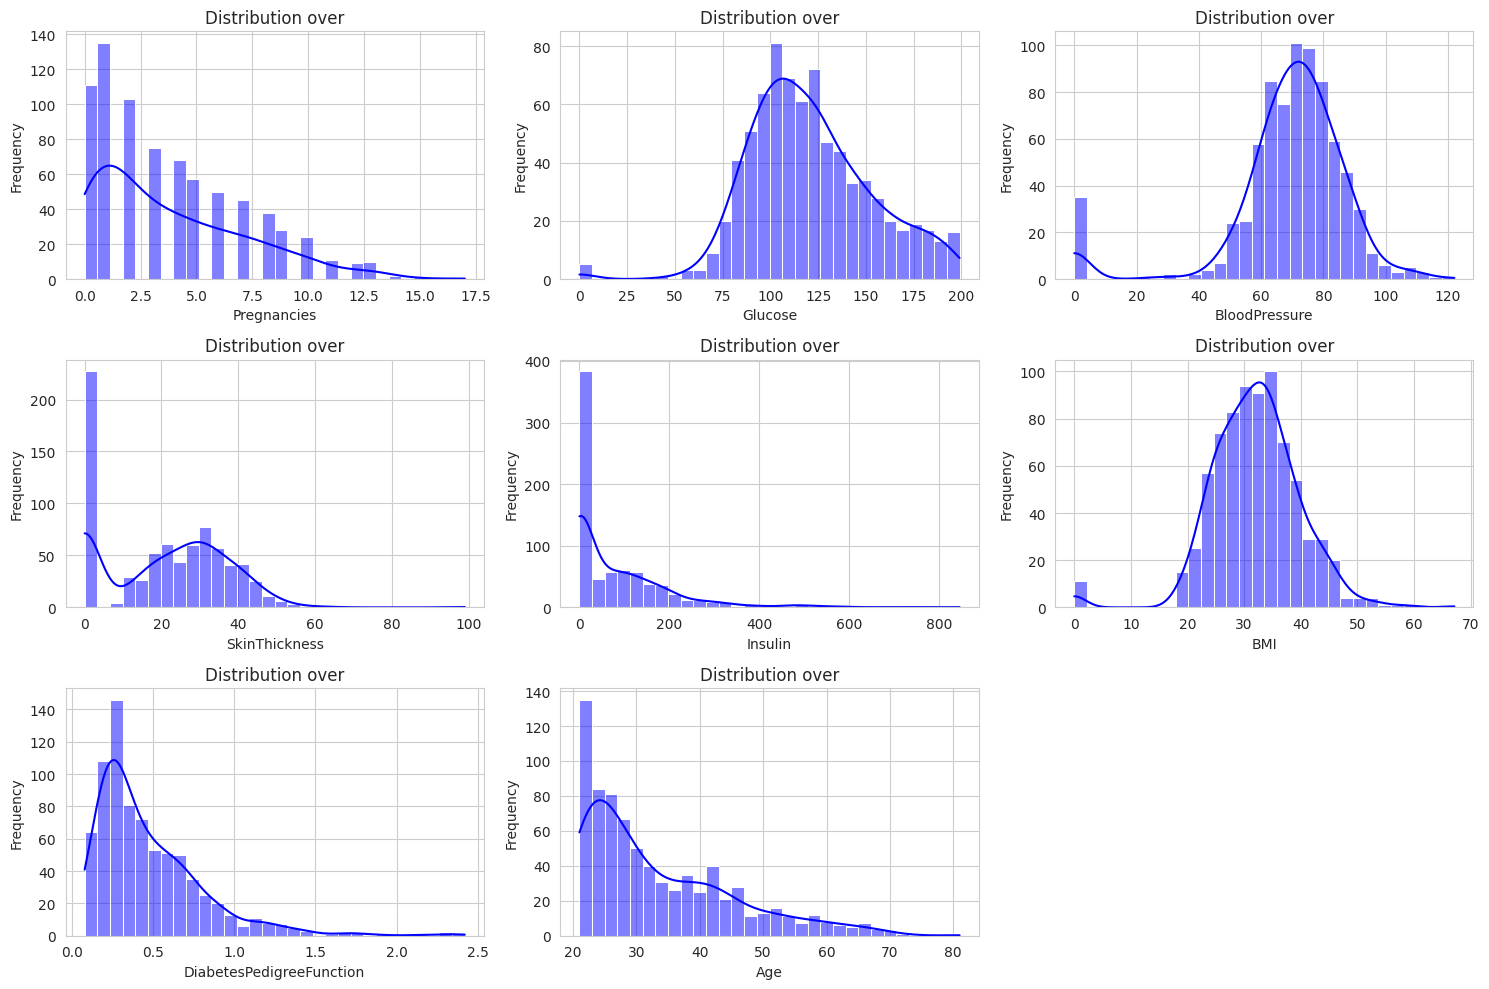

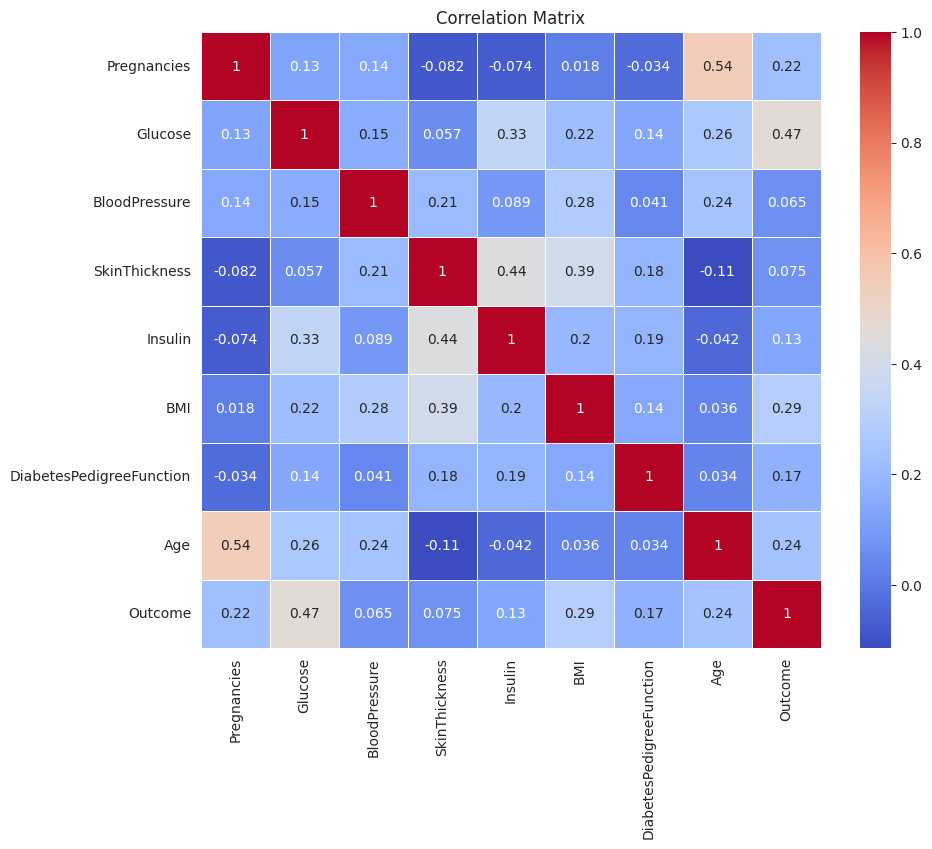

In [13]:
# Configure for visualization

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1],1):
  plt.subplot(3,3,i)
  sns.histplot(data[col], bins=30,kde=True,color="blue")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title("Distribution over")
plt.tight_layout()
plt.show()

# Correlation
plt.figure(figsize=(10,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### **Analysis and Conclusion:**
##### 1. Glucose variable appears to have small number of values set to 0 which may not be realistic and may require further review
##### 2. Patient Demography: Age variable is skewed to the right indicating majority of  women in dataset are relatively young. Similarly, Pregenancies shows a right-skewed distribution indicating majority of women in dataset have a low to moderate number of pregnancies
##### 3. Medical Factors: Variables Insulin, BloodPressure, and SkinThickness also have values of 0 so we need to decide if these are realistic or represent missing data in order to analyze prevalence of diabetes based on glucose levels, BMI, blood pressure, number of pregnancies, and genetic risk (DiabetesPedigreeFunction).
Other Factors: Investigate the relationship between insulin levels and diabetes prevalence
##### 4. Correlation matrix shows 'Glucose', 'BMI', and 'Age' have moderate correlation with 'Outcome' therefore they are more influential factors in determining diabetes in patient

Given the analysis, we can conclude 'Glucose', 'BMI', and 'Age' as dominating factors/variables in the dataset. Moreover, we can further normalize and split the data into training and testing sets in order to train a classsification model.

